In [1]:
# add path (for local)
import sys
repo_root = "../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

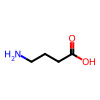

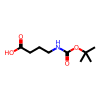

In [18]:
from rdkit import Chem
from rdkit.Chem import AllChem
from utils import draw_mol

mol = Chem.MolFromSmiles("NCCCC(=O)O")
draw_mol(mol, 100, 100)
# mol = Chem.MolFromSmiles("CCc1ccccc1")
# mol = Chem.MolFromSmiles("O[C@H](c1cncnc1C(CC(F)F)F)C(=O)[O-]")
# mol = Chem.AddHs(mol)

# smirks_list = [
#     "[cH:1]>>[c:1]C", "[cH:1]>>[c:1]CC", "[cH:1]>>[c:1]F", "[cH:1]>>[c:1]Cl", "[cH:1]>>[c:1]O", "[cH:1]>>[c:1][N+](=O)[O-]", # benzene-derivative
#     "[O:1][H]>>[O:1]C(C)=O", "[O:1][H]>>[O:1]C", "[O:1][H]>>[O:1]S(=O)(=O)c1ccc(C)cc1", # alcohol
#     "[N:1]([H])[H]>>[N:1]C(C)=O", "[N:1]([H])[H]>>[N:1]C(=O)OC(C)(C)C", "[N:1]([H])[H]>>[N:1]S(=O)(=O)c1ccccc1", # amine
#     "[C:1](=O)[O:2][H]>>[C:1](=O)[O:2]C", "[C:1](=O)[OH]>>[C:1](=O)[NH2]", "[C:1](=O)[OH]>>[C:1](=O)Cl", # carboxylic acid
#     "[c:1][Br]>>[c:1]c1ccccc1", "[c:1][Cl]>>[c:1]N", # cross-coupling # "[c:1][I]>>[c:1]C#CH"?
#     "[C:1]=[C:2]>>[C:1](O)[C:2](O)", "[C:1]=[C:2]>>[C:1](Br)[C:2](Br)", "[C:1](=O)[C:2]>>[C:1](=N[C:2])" # misc
# ]
smirks_list = ["[N:1]>>[N:1]C(=O)OC(C)(C)C"]

generated_mols = []
for smarts in smirks_list:
    try:
        rxn = AllChem.ReactionFromSmarts(smarts)

        products = rxn.RunReactants((mol,))
        for ps in products:
            for p in ps:
                generated_mols.append(p)
    except:
        continue
        
unique_smiles = set()
unique_mols = []

for mol in generated_mols:
    try:
        mol = Chem.RemoveHs(mol)
        smiles = Chem.MolToSmiles(mol, canonical=True)
        if smiles not in unique_smiles:
            unique_smiles.add(smiles)
            unique_mols.append(mol)
    except:
        continue
        
for mol in unique_mols:
    draw_mol(mol, 100, 100)

In [18]:
from rdkit import Chem
from ClickReaction import AlkalineEsterHydrolysis, AmideCoupling, AmideCouplingWithAnilines, BocRemoval, CuAAC, FmocRemoval, SulfonAmideFormation, SuzukiMiyaura

patterns = {
    "carboxylic_acid": Chem.MolFromSmarts("C(=O)[OH]"),
    "amine": Chem.MolFromSmarts("[NX3;H2,H1;!$(NC=O)]"),
    "aniline": Chem.MolFromSmarts("c[NX3;H2,H1]"),
    "alkyne": Chem.MolFromSmarts("C#C"),
    "azide": Chem.MolFromSmarts("N=[N+]=[N-]"),
    "sulfonyl_halide": Chem.MolFromSmarts("S(=O)(=O)[Cl,Br,F,I]"),
    "aryl_halide": Chem.MolFromSmarts("c[Cl,Br,I,F]"),
    "boronic_acid": Chem.MolFromSmarts("B(O)O"),
}

def detect_functional_groups(mol):
    results = {}
    for name, patt in patterns.items():
        results[name] = mol.HasSubstructMatch(patt)
    return results

initial_mol = Chem.MolFromSmiles("O=C(/[O-])c1cncnc1Cc1noc(-c2ccncc2)n1")
results = []

for reaction in [AlkalineEsterHydrolysis, BocRemoval, FmocRemoval]:
    try:
        result = reaction(initial_mol).get_product()
        results += result
    except:
        pass

mol_is = detect_functional_groups(initial_mol)

print(mol_is)

for r in results:
    print(Chem.MolToSmiles(r))

{'carboxylic_acid': False, 'amine': False, 'aniline': False, 'alkyne': False, 'azide': False, 'sulfonyl_halide': False, 'aryl_halide': False, 'boronic_acid': False}


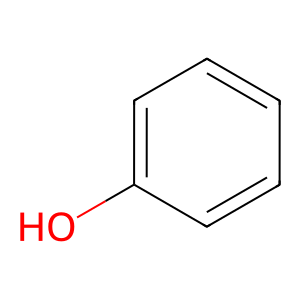

In [10]:
from transition import BioT5Transition
from node import MolStringNode
from language import SELFIES
from utils import draw_mol

transition = BioT5Transition(target_objective="improve LogP value")
root = MolStringNode.node_from_key("[C][=C][C][=C][C][=C][Ring1][=Branch1]", lang=SELFIES())
child = transition.sample_transition(root)
mol = child.mol()

draw_mol(mol)

In [1]:
import pandas as pd

df = pd.read_csv("generation_result/temp.csv")
df = df.iloc[-1000:, :] # for faster test
df

,order,time,key,d_score_reward,egfr,erbb2,abl,src,lck,pdgfr_beta,...,ephb4,solubility,permeability,metabolic_stability,toxicity,sa_score,qed,molecular_weight,tox_alert,has_chembl_substruct
199000,199001,6336.284896,NS(=O)(=O)N(C1CCOCC1)C(C1CCC1)C1C[C@@H](CC2CC2...,0.533149,4.696088,5.657204,5.201638,5.549522,5.531419,7.681599,...,6.109982,-2.864421,0.715732,59.249873,2.866554,4.584605,0.624360,465.538,1,1
199001,199002,6336.284896,N#CC1=NC(C(C2CCC2)N(C2CCOCC2)S(N)(=O)=O)C[C@@H...,0.567266,4.855446,5.596178,4.731853,5.303178,5.490512,7.545163,...,5.981750,-2.405853,0.585230,62.964114,2.496696,4.637319,0.666203,422.551,1,1
199002,199003,6336.348187,C[C@@H](C[NH3+])SC1CC(C(C2CCC2)N(C2CCOCC2)S(N)...,0.586852,4.825797,5.702112,5.083729,4.707756,5.001686,7.845058,...,5.809991,-1.138279,0.425651,62.845554,2.820080,5.126341,0.522661,460.730,1,1
199003,199004,6336.390501,NS(=O)(=O)N(C1CCOCC1)C(C1CCC1)C1CC(=O)C(Cl)[C@...,0.594220,4.797610,5.689680,4.946585,4.750157,4.978167,7.752089,...,6.078491,-2.008293,0.830671,71.804908,2.757871,4.592458,0.626066,433.014,1,1
199004,199005,6336.390501,NS(=O)(=O)N(C1CCOCC1)C(C1CCC1)C1C[C@@H](CC2CC2...,0.581451,4.744078,5.581488,5.272908,5.045070,4.978943,7.743910,...,6.138455,-1.865744,0.847070,68.820915,2.324455,4.621323,0.488686,434.986,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,6369.023685,N#C[C@@H]1CC(C(C2CCC2)N(C2CCOCC2)S(N)(=O)=O)C[...,0.494676,4.640816,5.643194,5.437269,5.393727,5.168560,7.813530,...,6.021445,-3.655306,0.804380,73.865366,2.878293,4.794077,0.660942,456.008,1,1
199996,199997,6369.072017,N#C[C@@H]1CC(C(C2CCC2)N(C2CCOCC2)S(N)(=O)=O)[C...,0.557729,4.661706,5.588748,5.268052,4.753034,5.222231,7.042464,...,5.884117,-0.769010,0.827263,86.791777,2.944497,5.025462,0.630755,435.364,1,1
199997,199998,6369.092552,N#C[C@@H]1CC(C(C2CCC2)N(C2CCOCC2)S(N)(=O)=O)[C...,0.571485,4.624242,5.632536,5.240743,4.737037,5.180342,7.171367,...,5.791954,-0.436445,0.948008,71.947353,2.821769,4.884913,0.588648,499.269,1,1
199998,199999,6369.128753,NS(=O)(=O)N(C1CCOCC1)C(C1CCC1)C1CC(N[C@@H](O)c...,0.498016,4.517376,5.642032,5.810058,4.852776,5.383073,7.791011,...,6.261558,-3.484860,0.947173,61.986895,2.400978,4.472077,0.477546,498.498,1,1


In [2]:
from rdkit import Chem
df["mol"] = df["key"].apply(Chem.MolFromSmiles)

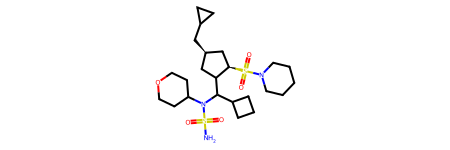

In [4]:
df["mol"][199043]

In [9]:
from rdkit.Chem import rdMMPA

def get_fragments(mol):
    return rdMMPA.FragmentMol(
        mol,
        maxCuts=3,
        maxCutBonds=20,
        resultsAsMols=True
    )

fragment_map = {}
for idx, row in df.iterrows():
    # print(idx)
    frags = get_fragments(row["mol"])
    for core, sidechain in frags:
        if core is None or sidechain is None:
            continue
        key = (Chem.MolToSmiles(core),)
        val = (Chem.MolToSmiles(sidechain), row["d_score_reward"], row["key"])
        fragment_map.setdefault(key, []).append(val)
        # print(key, val)

results = []
for core, entries in fragment_map.items():
    if len(entries) < 2:
        continue
    for i in range(len(entries)):
        for j in range(i + 1, len(entries)):
            sc1, p1, s1 = entries[i]
            sc2, p2, s2 = entries[j]
            delta = p2 - p1
            results.append({
                "core": core,
                "sc1": sc1,
                "sc2": sc2,
                "delta_property": delta,
                "smiles1": s1,
                "smiles2": s2
            })

mmpa_df = pd.DataFrame(results)

In [10]:
mmpa_df

,core,sc1,sc2,delta_property,smiles1,smiles2
0,"(NS(=O)(=O)N([*:1])[*:2],)",C1CC([*:2])CCO1.O=C1C(C(F)(F)F)=NC(C(C2CCC2)[*...,C1CC([*:2])CCO1.N#CC1=NC(C(C2CCC2)[*:1])C[C@@H...,0.034116,NS(=O)(=O)N(C1CCOCC1)C(C1CCC1)C1C[C@@H](CC2CC2...,N#CC1=NC(C(C2CCC2)N(C2CCOCC2)S(N)(=O)=O)C[C@@H...
1,"(NS(=O)(=O)N([*:1])[*:2],)",C1CC([*:2])CCO1.O=C1C(C(F)(F)F)=NC(C(C2CCC2)[*...,C1CC([*:2])CCO1.C[C@@H](C[NH3+])SC1CC(C(C2CCC2...,0.053703,NS(=O)(=O)N(C1CCOCC1)C(C1CCC1)C1C[C@@H](CC2CC2...,C[C@@H](C[NH3+])SC1CC(C(C2CCC2)N(C2CCOCC2)S(N)...
2,"(NS(=O)(=O)N([*:1])[*:2],)",C1CC([*:2])CCO1.O=C1C(C(F)(F)F)=NC(C(C2CCC2)[*...,C1CC([*:2])CCO1.O=C1CC(C(C2CCC2)[*:1])C[C@@H](...,0.061071,NS(=O)(=O)N(C1CCOCC1)C(C1CCC1)C1C[C@@H](CC2CC2...,NS(=O)(=O)N(C1CCOCC1)C(C1CCC1)C1CC(=O)C(Cl)[C@...
3,"(NS(=O)(=O)N([*:1])[*:2],)",C1CC([*:2])CCO1.O=C1C(C(F)(F)F)=NC(C(C2CCC2)[*...,C1CC([*:2])CCO1.O=C1OC(C(C2CCC2)[*:1])C[C@@H](...,0.048302,NS(=O)(=O)N(C1CCOCC1)C(C1CCC1)C1C[C@@H](CC2CC2...,NS(=O)(=O)N(C1CCOCC1)C(C1CCC1)C1C[C@@H](CC2CC2...
4,"(NS(=O)(=O)N([*:1])[*:2],)",C1CC([*:2])CCO1.O=C1C(C(F)(F)F)=NC(C(C2CCC2)[*...,C1CC([*:2])CCO1.CS(=O)(=O)C1OC(C(C2CCC2)[*:1])...,0.061471,NS(=O)(=O)N(C1CCOCC1)C(C1CCC1)C1C[C@@H](CC2CC2...,CS(=O)(=O)C1OC(C(C2CCC2)N(C2CCOCC2)S(N)(=O)=O)...
...,...,...,...,...,...,...
3246756,(N#C[C@@H]1CC(C(N(C2CCOCC2)S(N)(=O)=O)[*:1])C[...,C1CC([*:1])C1.CC(C)(C)c1nnn([*:2])n1,C1CC([*:1])C1.O=C(Nc1ccccc1)c1nnn([*:2])c1F,-0.037573,CC(C)(C)c1nnn([C@H]2CC(C(C3CCC3)N(C3CCOCC3)S(N...,N#C[C@@H]1CC(C(C2CCC2)N(C2CCOCC2)S(N)(=O)=O)C[...
3246757,"(N#C[C@@H]1CC(C([*:1])[*:2])C[C@@H]1[*:3],)",C1CC([*:1])C1.CC(C)(C)c1nnn([*:3])n1.NS(=O)(=O...,C1CC([*:1])C1.NS(=O)(=O)N(C1CCOCC1)[*:2].O=C(N...,-0.037573,CC(C)(C)c1nnn([C@H]2CC(C(C3CCC3)N(C3CCOCC3)S(N...,N#C[C@@H]1CC(C(C2CCC2)N(C2CCOCC2)S(N)(=O)=O)C[...
3246758,(N#C[C@@H]1CC(C(N(S(N)(=O)=O)[*:2])[*:1])C[C@@...,C1CC([*:1])C1.C1CC([*:2])CCO1.CC(C)(C)c1nnn([*...,C1CC([*:1])C1.C1CC([*:2])CCO1.O=C(Nc1ccccc1)c1...,-0.037573,CC(C)(C)c1nnn([C@H]2CC(C(C3CCC3)N(C3CCOCC3)S(N...,N#C[C@@H]1CC(C(C2CCC2)N(C2CCOCC2)S(N)(=O)=O)C[...
3246759,"(N#C[C@@H]1CC(C(C2CCC2)[*:1])C[C@@H]1[*:2],)",CC(C)(C)c1nnn([*:2])n1.NS(=O)(=O)N(C1CCOCC1)[*:1],NS(=O)(=O)N(C1CCOCC1)[*:1].O=C(Nc1ccccc1)c1nnn...,-0.037573,CC(C)(C)c1nnn([C@H]2CC(C(C3CCC3)N(C3CCOCC3)S(N...,N#C[C@@H]1CC(C(C2CCC2)N(C2CCOCC2)S(N)(=O)=O)C[...


In [11]:
mmpa_df["smirks"] = mmpa_df.apply(lambda row: f"{row['sc1']}>>{row['sc2']}", axis=1)

smirks = (
    mmpa_df.groupby("smirks")["delta_property"]
    .agg(["mean", "std", "count"])
    .reset_index()
    # .sort_values("mean", ascending=False)
)

In [12]:
smirks

,smirks,mean,std,count
0,BrC1CC(C(C2CCC2)[*:1])C[C@@H](C2CC2)C1.C1CC([*...,-0.599905,NaN,1
1,BrC1CC(C(C2CCC2)[*:1])C[C@@H](C2CC2)C1.C1CC([*...,-0.599905,NaN,1
2,BrC1CC(C(C2CCC2)[*:1])C[C@@H](C2CC2)C1.C1CC([*...,-0.599905,NaN,1
3,BrC1CC(C(C2CCC2)[*:1])C[C@@H](C2CC2)C1.C1CC([*...,-0.599905,NaN,1
4,BrC1CC(C(C2CCC2)[*:1])C[C@@H](C2CC2)C1.C1CC([*...,-0.050590,NaN,1
...,...,...,...,...
3245701,[NH3+][*:2].c1csc(C[*:1])c1>>[NH3+][*:2].c1cnc...,0.031748,NaN,1
3245702,c1ccc(C[*:1])cc1.c1ccc2[nH]c([*:2])nc2c1>>c1cc...,0.141675,NaN,1
3245703,c1ccc([*:1])cc1.c1ccc([*:2])cc1>>c1ccc([*:1])c...,-0.015973,NaN,1
3245704,c1ccc([*:1])cc1.c1ccc2[nH]c([*:2])nc2c1>>c1ccc...,0.141675,NaN,1


In [13]:
from rdkit.Chem import AllChem

def apply_smirks(mol: Chem.Mol, smirks: str):
    try:
        rxn = AllChem.ReactionFromSmarts(smirks, useSmiles=True)
        products = rxn.RunReactants((mol,))
        return products
    except Exception as e:
        return []

In [14]:
culled_smirks = smirks[smirks["mean"] > 0]
culled_smirks = culled_smirks[culled_smirks["count"] > 1]

In [16]:
mol = Chem.MolFromSmiles("O[C@H](c1cncnc1C(CC(F)F)F)C(=O)[O-]")

In [20]:
for s in culled_smirks["smirks"]:
    result = apply_smirks(mol, s)
    if result:
        print(result)

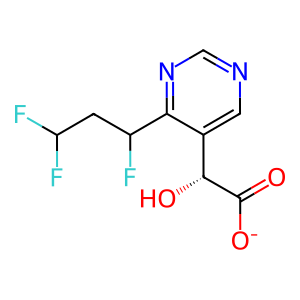

In [24]:
from utils import draw_mol
mol = Chem.MolFromSmiles("O[C@H](c1cncnc1C(CC(F)F)F)C(=O)[O-]")
draw_mol(mol)